<h1>Assignment chapter-1</h1>

<p>Importing packages</p>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import module to view available datasets
import ISLP.data

# Import the main ISLP package
from ISLP import load_data



In [ ]:
# Load data set

auto = load_data("Auto")

auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1


In [5]:
#Drop null values

auto = auto.dropna() 
auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
name,,,,,,,,
chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
vw pickup,44.0,4,97.0,52,2130,24.6,82,2
dodge rampage,32.0,4,135.0,84,2295,11.6,82,1


<p>(a) Which of the predictors are quantitative, and which are qualitative?</p>

In [7]:
auto.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, chevrolet chevelle malibu to chevy s-10
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    int64  
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   year          392 non-null    int64  
 7   origin        392 non-null    int64  
dtypes: float64(3), int64(5)
memory usage: 27.6+ KB


Qualitative: 'name', 'origin' <br><br>
Quantitative: mpg, cylinders, displacement, horsepower, weight, acceleration, year

<p>(b) What is the range of each quantitative predictor? You can answer this using the range() function. </p>

In [9]:
quantitative = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year']

for col in quantitative:
    print(f"{col} range: {auto[col].min()} - {auto[col].max()}")


mpg range: 9.0 - 46.6
cylinders range: 3 - 8
displacement range: 68.0 - 455.0
horsepower range: 46 - 230
weight range: 1613 - 5140
acceleration range: 8.0 - 24.8
year range: 70 - 82


<p>(c)	What is the mean and standard deviation of each quantitative predictor? </p>

In [12]:
auto[quantitative].describe().loc[['mean', 'std']]

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
mean,23.445918,5.471939,194.411990,104.469388,2977.584184,15.541327,75.979592
std,7.805007,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737


(d)	 Now remove the 10th through 85th observations. What is the range, mean, and standard deviation of each predictor in the subset of the data that remains? 

In [14]:
Auto_removed = auto.drop(auto.index[9:85]) 
for col in quantitative:
    rng = Auto_removed[col].max() - Auto_removed[col].min()
    print(f"{col}: Range = {rng}, Mean = {Auto_removed[col].mean():.2f}, Std Dev = {Auto_removed[col].std():.2f}")


mpg: Range = 35.6, Mean = 25.04, Std Dev = 7.91
cylinders: Range = 5, Mean = 5.27, Std Dev = 1.63
displacement: Range = 387.0, Mean = 179.37, Std Dev = 95.51
horsepower: Range = 184, Mean = 98.72, Std Dev = 33.82
weight: Range = 3197, Mean = 2881.51, Std Dev = 792.55
acceleration: Range = 15.100000000000001, Mean = 15.74, Std Dev = 2.57
year: Range = 12, Mean = 77.51, Std Dev = 2.99


(e)	Using the full data set, investigate the predictors graphically, using scatterplots or other tools of your choice. Create some plots highlighting the relationships among the predictors. Comment on your findings.

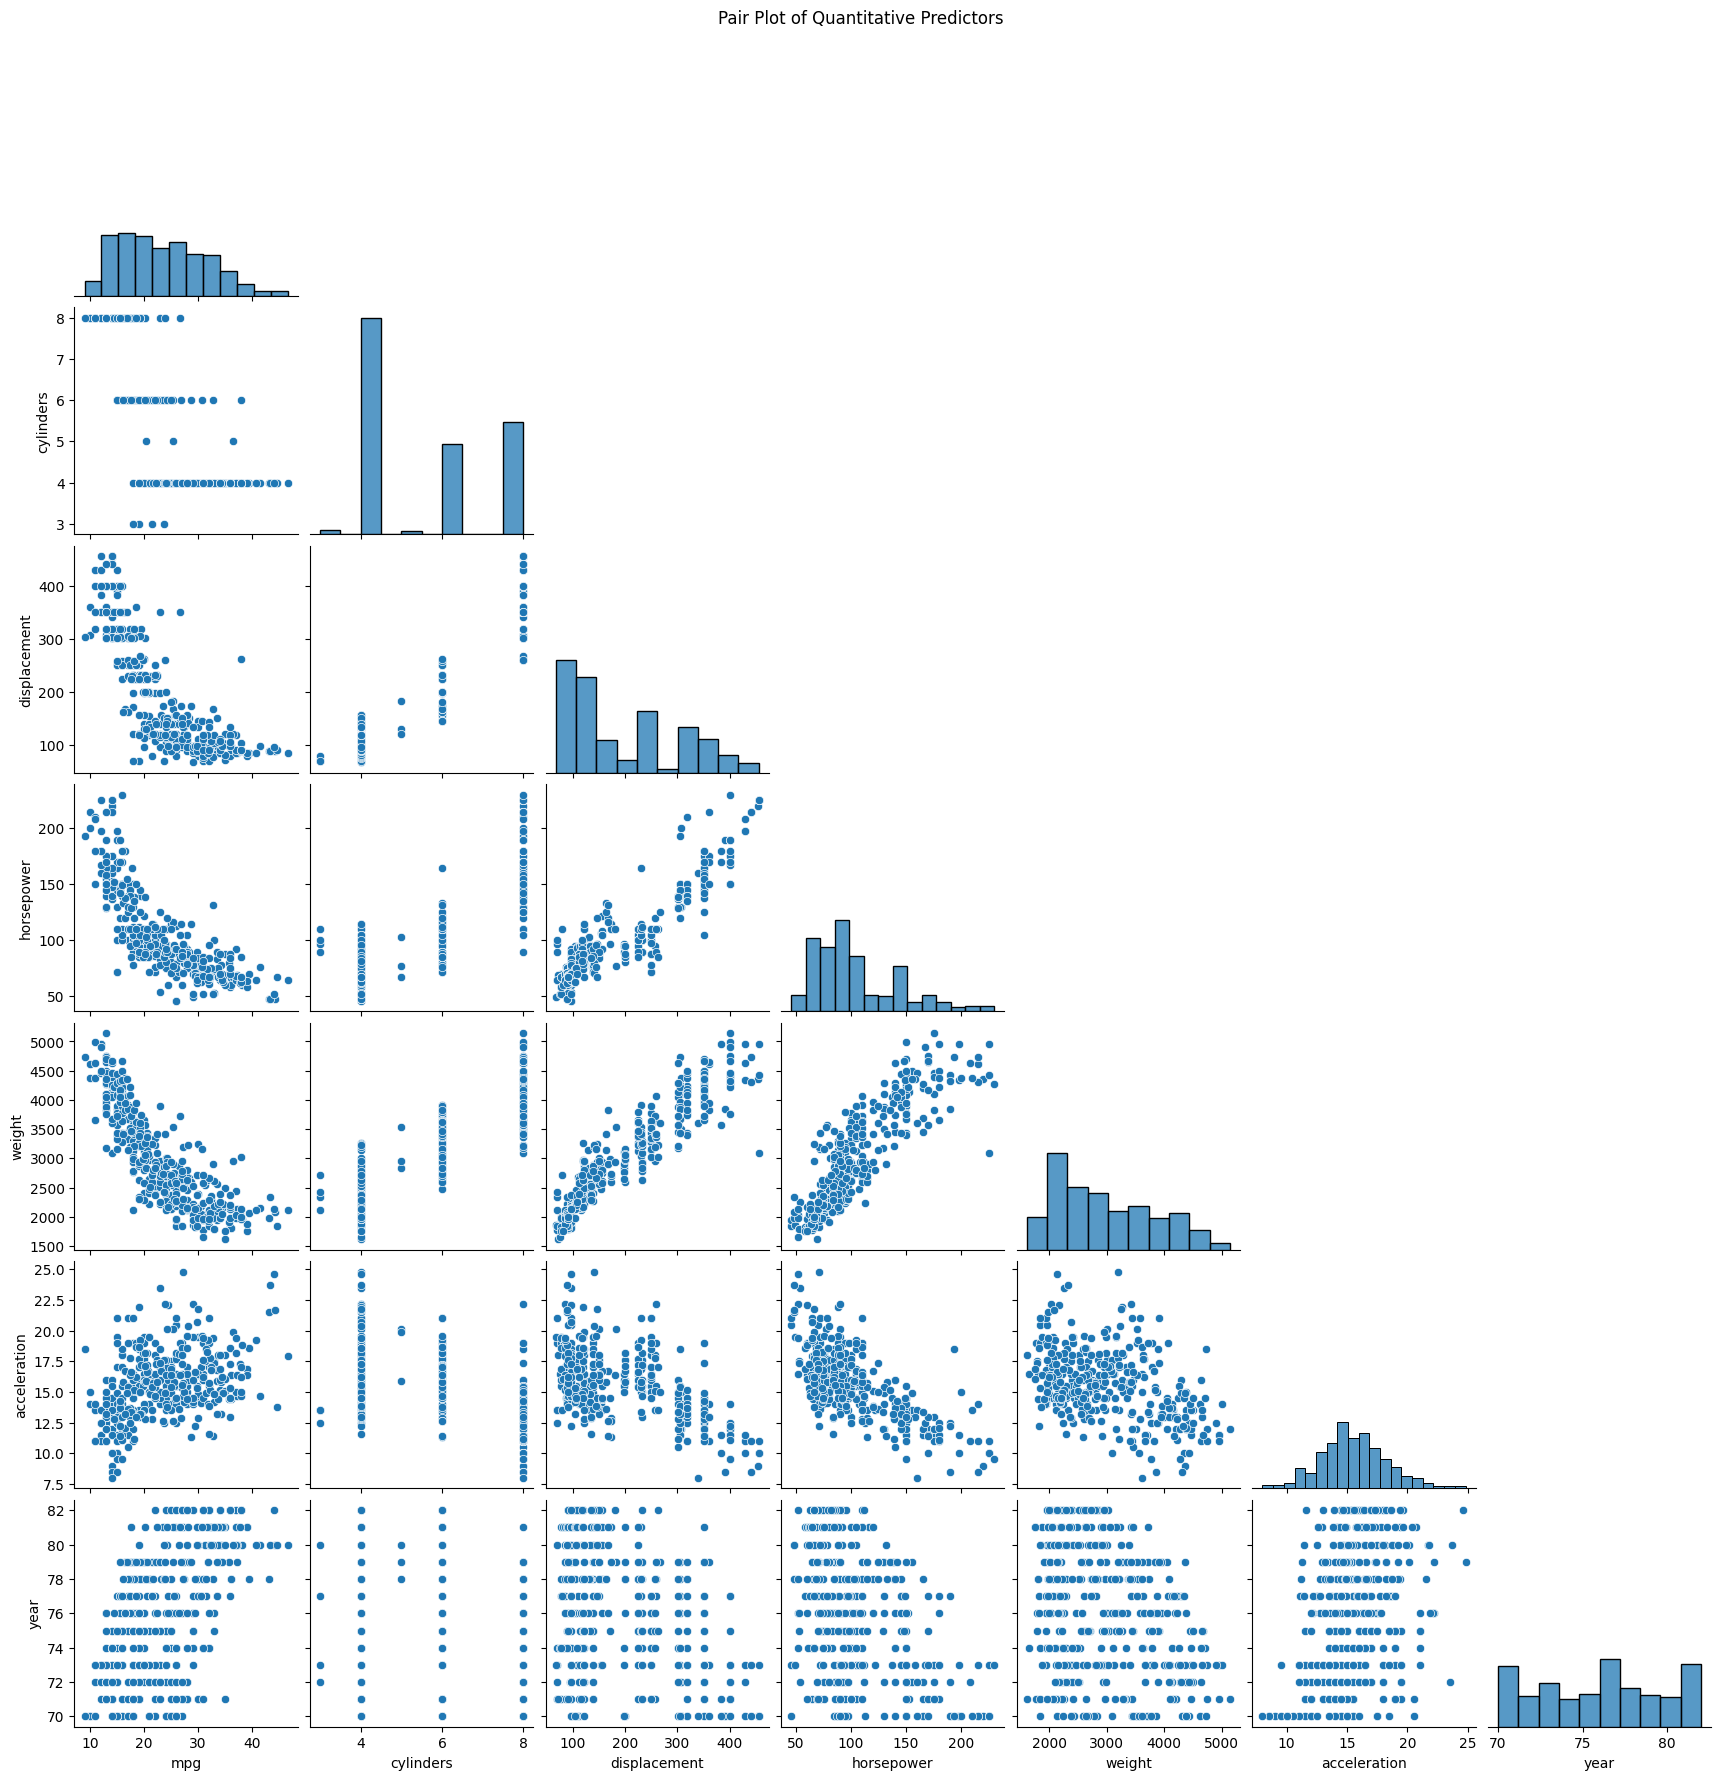

In [15]:
sns.pairplot(auto[quantitative], corner=True)  
plt.suptitle('Pair Plot for Quantitative Predictors', y=1.02)
plt.show()

pair plot shows, Cars with bigger engines, more power, and heavier weight usually give lower mileage (mpg). Newer cars seem to give better mileage, maybe because of better technology. Acceleration doesn’t affect mileage much. Overall, engine size, power, and weight are linked and affect fuel efficiency.

(f) Suppose that we wish to predict gas mileage (mpg) on the basis of the other variables. Do your plots suggest that any of the other variables might be useful in predicting mpg? Justify your answer


<b>Answer: <br><br>
Yes, the plots suggest that some variables are useful in predicting mpg. We can see a strong negative relationship between mpg and variables like weight, horsepower, and displacement—as these values increase, mpg decreases. This means heavier or more powerful cars usually have lower fuel efficiency. Also, year shows a slight positive trend with mpg, so newer cars tend to be more fuel-efficient. These variables can help us predict mpg more accurately.